In [1]:
using Pkg, Revise
Pkg.activate("../.")

  Activating project at `~/MEGA/EMAP/Diagrams.jl`


In [2]:
using LinearAlgebra: norm, normalize, dot

In [11]:
using Meshes, MeshViz

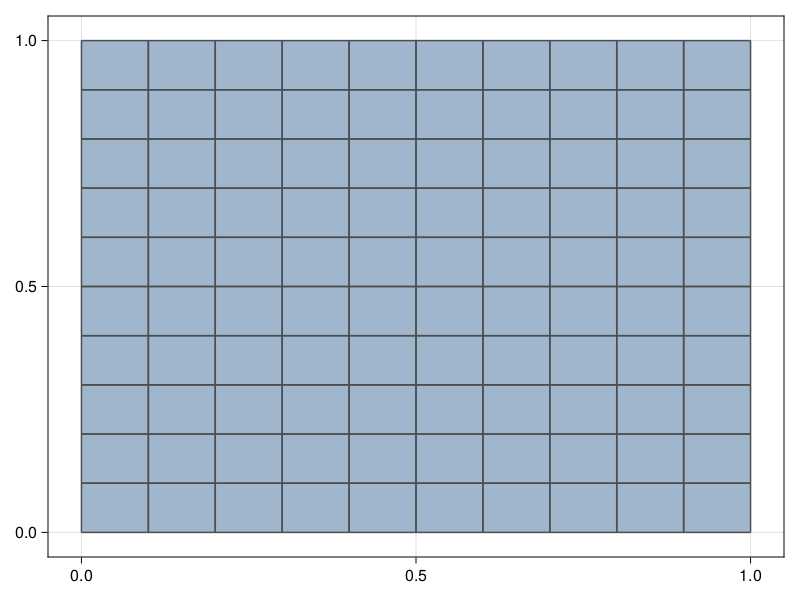

In [512]:
import CairoMakie as Makie
using CairoMakie

grid = CartesianGrid(10,10)
grid = RectilinearGrid(0:0.1:1,0:0.1:1)

viz(grid, showfacets = true)

In [513]:
vertices(values(grid)[1])[1]

Base.:+(a::Point, b::Point) = Point(a.coords + b.coords)
Base.:-(a::Point, b::Point) = Point(a.coords - b.coords)
Base.:*(a::Point, b::Point) = Point(a.coords * b.coords)
Base.map(f, a::Point) = Point(map(f,a.coords))
Base.map(f,v::Vector{<:Point}) = map(x-> map(f,x),coordinates.(v))

function Base.map(f,m::Mesh)
    topo = topology(m)
    vert = coordinates.(vertices(m))
    SimpleMesh(Point.(map(f,vert)),topo)
end

complexify(v) = v[1] + v[2]im

decomplexify(c) = [c.re, c.im]

@show map(abs, Point(-1,-1))
@show map(abs,[Point(-1,0),Point(0,-1)]);
@show map(x->x+[1,1], grid);

map(abs, Point(-1, -1)) = Point(1.0, 1.0)
map(abs, [Point(-1, 0), Point(0, -1)]) = Vec2[[1.0, 0.0], [0.0, 1.0]]
map((x->begin
            #= In[513]:21 =#
            x + [1, 1]
        end), grid) = 100 SimpleMesh{2,Float64}


In [514]:
f(z) = z^4
F(v) = (decomplexify ∘ f ∘ complexify)(v)
F(v) = [(exp(v[1])-1)*cos(2π*v[2]),(exp(v[1])-1)*sin(2π*v[2])]

F (generic function with 1 method)

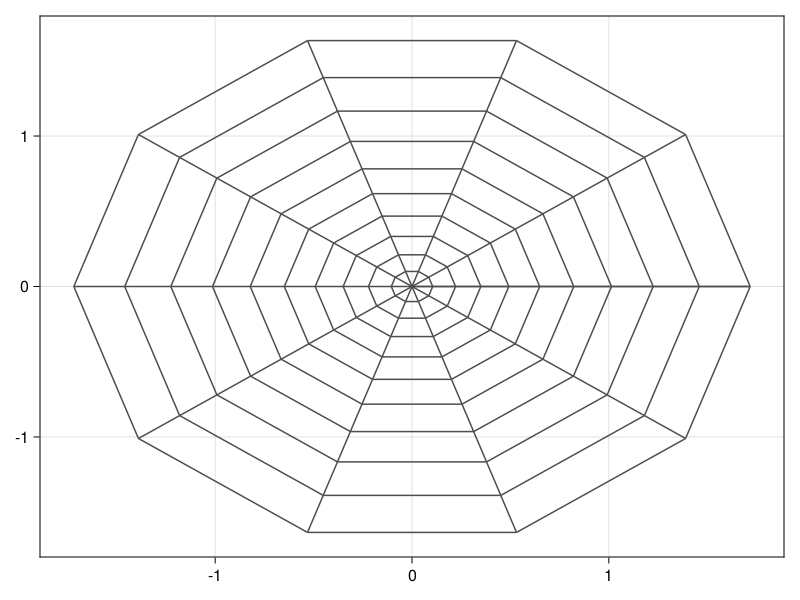

In [515]:
# m = map(x->x+[10,10], grid)
m = map(F,grid);
viz(grid, showfacets = true,alpha=0)
viz(m, showfacets = true,alpha=0)

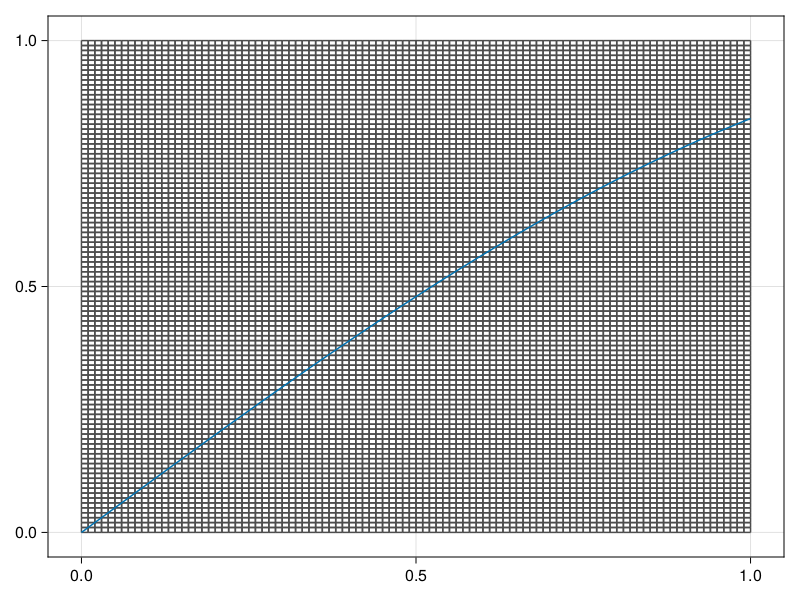

In [447]:
fig = viz(grid, showfacets = true,alpha=0)
x = range(0, 1, length=100)
y = sin.(x)
CairoMakie.lines!(x, y)
fig

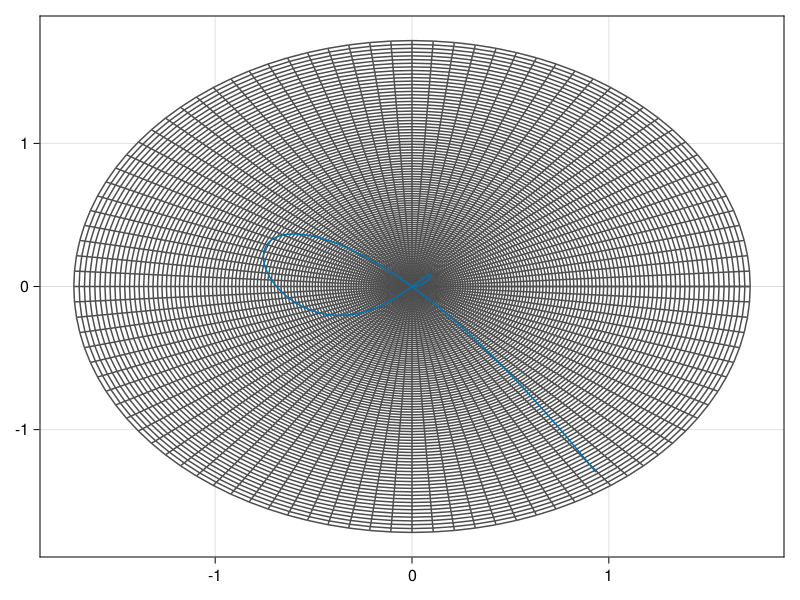

In [472]:
fig = viz(m, showfacets = true,alpha=0)
x = range(0, 1, length=100)
y = sin.(x)

x = [F(i)[1] for i in zip(collect(x),y)]
y = [F(i)[2] for i in zip(collect(x),y)]
CairoMakie.lines!(x, y)
fig

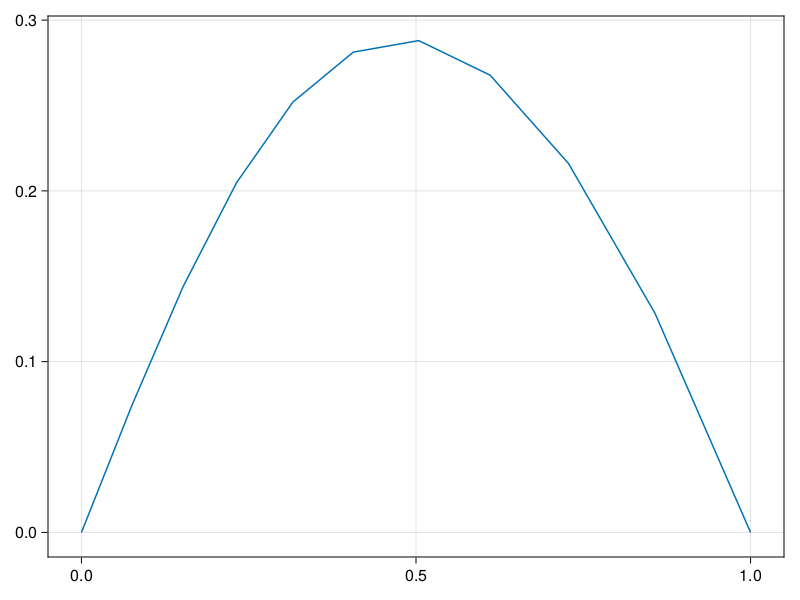

In [511]:
# Bézier
M = [1 0 0 0;
     -3 3 0 0;
     3 -6 3 0;
    -1 3 -3 1]
P(t,p1,p2,p3,p4) = vec([1 t t^2 t^3]* M * hcat(p1,p2,p3,p4)')
p1 = [0,0]
p2 = [0.25,0.25]
p3 = [0.5,0.5]
p4 = [1,0]

p = hcat([P(t,p1,p2,p3,p4)[1] for t in 0:0.1:1],
    [P(t,p1,p2,p3,p4)[2] for t in 0:0.1:1])

Makie.lines(p)

In [ ]:
bezier()

In [434]:
# f(z) = z^2.0
# circle(θ) = Point([cos(θ) , sin(θ)]) + Point(10,10)

# c = Chain(vcat(circle.(0:0.1:2π),circle(0)))

# ct = Chain(Point.(map(F,coordinates.(vertices(c)))))

# viz(ct)

In [321]:
# m = map(F,c);
# viz(m, showfacets = true,alpha=0)